# SOURCE: Master math by coding in Python
## SECTION: Derivatives of polynomials

Leveraging the video lessons on python and math to gather a refresher on Calculus

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from IPython.display import display,Math

## SECTION: Derivatives of polynomials

In [2]:
from sympy.abc import x

fx = x**2
sym.diff(fx)

2*x

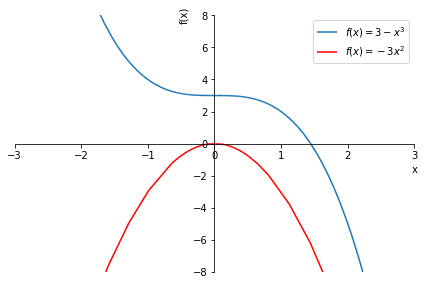

In [12]:
# Plotting with sympy

import sympy.plotting.plot as symplot

fx = 3 - x ** 3

p = symplot(fx, (x, -3, 3), show=False)
p.extend(symplot(sym.diff(fx), show=False))
p[1].line_color = 'r'
p[0].label = '$f(x) = %s$' %sym.latex(fx)
p[1].label = '$f(x) = %s$' %sym.latex(sym.diff(fx))

p.legend = True
p.ylim = [-8,8]
p.xlim = [-3,3]
p.show()

### Exercise: Derivatives 

In [24]:
f = 3 + 2*x - 5*x**2 + 7*x**4
g = 4*x**2 + x**5

df = sym.diff(f)
dg = sym.diff(g)

d_f_times_g = sym.diff(f*g)
df_times_dg = sym.diff(f) * sym.diff(g)

In [25]:
# Summation Rule
## The sum of two derivatives is the same as their individual derivatives

sym.diff(f + g) == sym.diff(f) + sym.diff(g)

True

In [27]:
dfPlusg  = sym.diff(f+g)

display(Math('(f+ g)\' = %s' %sym.latex(sym.expand(dfPlusg))))
display(Math('f\' + g\' = %s' %sym.latex(sym.expand(df+dg))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [29]:
# Product Ruke
## The product of two derivatives is not the same a multipling two functions together can then taking the der

sym.diff(f * g) != sym.diff(f) * sym.diff(g)

display(Math('\\text{Without applying the product rule:}'))
display(Math('\\quad (f\\times g)\' = %s' %sym.latex(sym.expand(d_f_times_g))))
display(Math('\\quad f\' \\times g\' = %s' %sym.latex(sym.expand(df_times_dg))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [30]:
# The correct way to multiple to derivatives together
sym.diff(f * g) == (sym.diff(f) * g ) + (f * sym.diff(g))

# apply the product rule
display(Math('\\text{With the product rule: }'))
display(Math('\\quad (f\\times g)\' = %s' %sym.latex(sym.expand(d_f_times_g))))
display(Math('\\quad f\'\\times g+f\\times g\' = %s' %sym.latex(sym.expand(df*g+f*dg))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Trig Derivatives

In [41]:
q = sym.symbols('q')

# Showing it in a loop
f = sym.cos(x)

for i in range(0,4):
    display(Math('\\frac{d}{dx}%s = %s' %(sym.latex(f),sym.latex(sym.diff(f)))))
    f = sym.diff(f)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

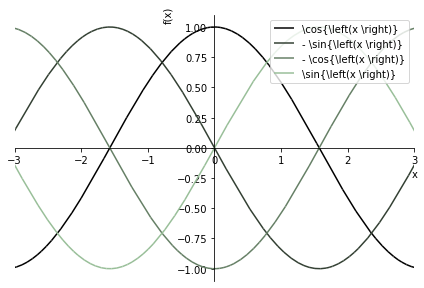

In [42]:
# Generating it as a plot
f = sym.cos(x)

for i in range(0,4):
    if i==0:
        p = symplot(f,show=False,line_color=(i/5,i/4,i/5),label=sym.latex(f))
    else:
        p.extend( symplot(f,show=False,line_color=(i/5,i/4,i/5),label=sym.latex(f)) )
    f = sym.diff(f)
    
p.legend = True
p.xlim = [-3,3]
p.show()

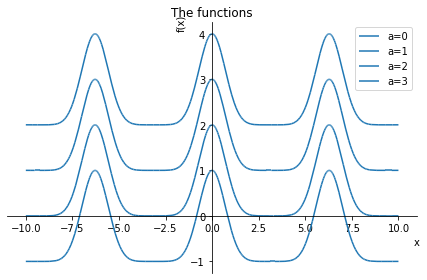

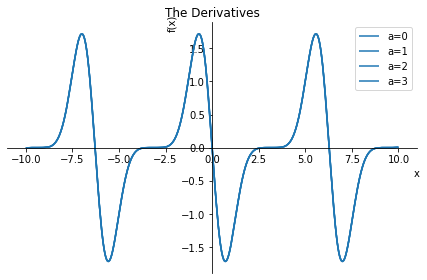

In [53]:
## Exercise: Trig Derivatives
a = sym.symbols('a')

gx = sym.cos(x + sym.sin(x)) + a

for ai in range(0,4):
    if ai==0:
        p = symplot(gx.subs(a, ai), show=False, label="a=" + str(ai))
    else:
        p.extend(symplot(gx.subs(a, ai), show=False, label="a=" + str(ai)))

p.title = 'The functions'
p.legend = True
p.show()

for ai in range(0,4):
    if ai==0:
        p = symplot(sym.diff(gx.subs(a, ai)), show=False, label="a=" + str(ai))
    else:
        p.extend(symplot(sym.diff(gx.subs(a, ai)), show=False, label="a=" + str(ai)))

p.title = 'The Derivatives'
p.legend = True
p.show()


## Tangent Lines

In [2]:
x = sym.symbols('x')

# Define the function and the derivative
f = x ** 2
df = sym.diff(f)

# value at which to compute
xa = 1 

# get the function and derivative value at x_a
fa = f.subs(x,xa)
dfa = df.subs(x,xa)

print(fa)
print(dfa)

1
2


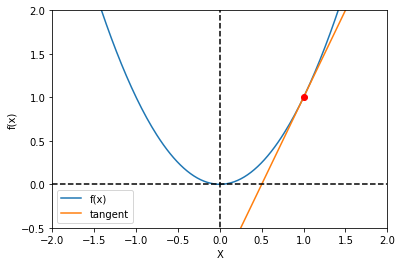

In [12]:
# Convert to nmpy function
xx = np.linspace(-2,2,200)

f_lambda = sym.lambdify(x,f)(xx)
df_lambda = sym.lambdify(x,df)(xx)

tang_line = dfa * (xx -xa) + fa

plt.plot(xx, f_lambda, label="f(x)")
plt.plot(xx, tang_line, label="tangent")
plt.plot(xa, fa, 'ro')

plt.axis([-2, 2, -.5, 2])
ax = plt.gca()
plt.plot(ax.get_xlim(),[0,0],'k--')
plt.plot([0,0],ax.get_xlim(),'k--')
plt.xlabel('X')
plt.ylabel('f(x)')
plt.legend()


plt.show()

## Creating a cool tangent lines

In [13]:
def computetangent(f,xa,bnds):
    # define function and derivative values at that point
    df = sym.diff(f)
    fa = f.subs(x,xa)
    df_a = df.subs(x,xa)

    # evaluate the tangent line
    xx = np.linspace(bnds[0],bnds[1],200)
    return df_a * (xx - xa) + fa

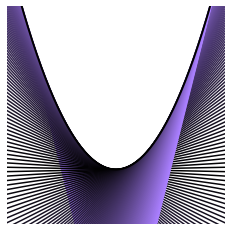

In [14]:
x = sym.symbols('x')
f = x**2
xx = np.linspace(-2,2,200)
f_fun  = sym.lambdify(x,f)(xx)


for i in xx:
    yy = computetangent(f,i,xx[[0,-1]])
    plt.plot(xx,yy,color=[abs(i)/3,abs(i)/4,abs(i)/2])


# plot it!
plt.plot(xx,f_fun,'k',linewidth=2)

plt.axis('square')
plt.axis([-2,2,-1,3])
plt.axis('off')
plt.show()